In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.abspath(''), '../'))
from pprint import pprint
from dataset.data_loader import DataLoader, playtime_forever_users_games_edge_scoring_function, LinearNormalizer, GaussianNormalizer, PercentileNormalizer
from utils.utils import get_game_name_and_scores

from models.ncf_model import NCFModel

In [10]:
# Test Fine Tuning on live data
model = NCFModel()

data_loader = DataLoader.load_from_file('test_evaluation_data_loader', use_published_models_path=True, load_live_data_loader=True)
model.load('evaluation_test_ncf_low_weight_decay_increased_lr_best_model_bugfix', load_published_model=True)
# data_loader = DataLoader.load_from_file('test_evaluation_data_loader_embed_all_except_tags_genres', use_published_models_path=True, load_live_data_loader=True)
# model.load('evaluation_test_ncf_embed_all_except_tags_genres_best_model_bugfix_clip_embeddings', load_published_model=True)

model.new_seed(None)
model.set_data_loader(data_loader)
user_to_fine_tune = 76561198835352289 # 76561198166465514 #  #  #  # 76561198103368250
print('Before', model.get_score_between_user_and_game(76561198880605436, 367520))
model.fine_tune(user_to_fine_tune, debug=False)
print('After', model.get_score_between_user_and_game(76561198880605436, 367520))
print('Fine Tuned User Output')
print(model.get_score_between_user_and_game(user_to_fine_tune, 367520))
display(get_game_name_and_scores(data_loader, model.score_and_predict_n_games_for_user(user_to_fine_tune)[:10]))
display(get_game_name_and_scores(data_loader, model.score_and_predict_n_games_for_user(user_to_fine_tune)[-10:]))

Before 0.6973773837089539
After 0.6973773837089539
Fine Tuned User Output
0.7474184036254883


,id,name,score
0,271590,Grand Theft Auto V,1.354579
1,1245620,ELDEN RING,1.279492
2,1454400,Cookie Clicker,1.247319
3,1904540,Football Manager 2023,1.170892
4,582010,Monster Hunter: World,1.132652
5,1811260,EA SPORTS™ FIFA 23,1.111386
6,1506830,FIFA 22,1.108001
7,2072450,Like a Dragon: Infinite Wealth,1.056437
8,2344520,Diablo® IV,1.055332
9,1142710,Total War: WARHAMMER III,1.048978


,id,name,score
0,558850,Children of Colossus,0.671159
1,2539120,Erotic Justice,0.669536
2,559260,Wayward Souls,0.668622
3,603280,TAROTICA VOO DOO,0.667800
4,508580,CasinoXR,0.666296
5,575450,Graceful Explosion Machine,0.665471
6,1646120,Citizens: Far Lands,0.663702
7,815150,Knight Bewitched,0.662495
8,1286330,WhiteLily 2：梦醒少女,0.660530
9,1258480,Aladdin - Hidden Objects Game,0.659706


In [2]:
# Test cold fine tune eval on a user
data_loader = DataLoader(cache_local_dataset=True, users_games_edge_scoring_function = playtime_forever_users_games_edge_scoring_function, user_game_edge_embeddings = ['playtime_forever'], users_games_edge_score_normalizers = [GaussianNormalizer(1.0, 1.0)], interactions_score_normalizers = [GaussianNormalizer(0.0, 1.0)], game_embeddings=['name'])
data_loader.load_random_user_train_tune_test_split(train_user_percentage=0.8, test_user_percentage=0.2, fine_tune_edge_percentage=0.8, test_edge_percentage=0.2, seed=0)

/Users/jackson/.pyenv/versions/3.11.3/envs/ml_project_3.11.3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Fine Tuned User Output


,id,name,score
0,804120,Oneness,1.669645
1,1245620,ELDEN RING,1.637617
2,605850,Pinball Inside: A VR Arcade Game,1.557560
3,1005130,Delicious - Emily's Road Trip,1.556774
4,1990590,Nightmare Hunter,1.530539
5,746940,Nippon Marathon,1.499870
6,251650,Ray's The Dead,1.492086
7,1412070,Siege the Day,1.487475
8,765650,TSUKUMOHIME,1.464211
9,319210,Space Salvager,1.425760


,id,name,score
0,352440,Catacombs of the Undercity,0.514770
1,737500,Chio Hero,0.513150
2,1059430,PAGAN PEAK VR,0.511775
3,2651330,Intravenous 2: Mercenarism,0.509202
4,598590,Escape 2042 - The Truth Defenders,0.508670
5,267360,MURI,0.505348
6,2398030,FPV LOGIC,0.504692
7,34630,Massive Assault,0.503913
8,1075400,Doctor Who: The Edge Of Time,0.501265
9,2482030,Aikagura,0.499507


Fine Tuned User Output


,id,name,score
0,1343810,Fallen Hero: Retribution,1.601343
1,704880,Trident's Wake,1.575552
2,237630,DuckTales: Remastered,1.392298
3,335300,DARK SOULS™ II: Scholar of the First Sin,1.281047
4,1715730,Boo Men,1.261084
5,696170,SENRAN KAGURA Peach Beach Splash,1.249774
6,1615060,Yummy Girl,1.099387
7,2303350,Sticky Business,1.078578
8,259340,Chicken Shoot Gold,1.075061
9,827120,Les Misérables: Cosette's Fate,1.073412


,id,name,score
0,370120,Pirate Code,0.686532
1,260000,YOU DON'T KNOW JACK MOVIES,0.686270
2,790860,Chocolate makes you happy 3,0.686192
3,1315210,Ikai,0.684788
4,1896880,Dungeons of Dreadrock,0.684436
5,1909810,Seventh Lair,0.684250
6,641910,Bike Rush,0.682626
7,1353270,Five Dates,0.681031
8,1076100,Illusion of L'Phalcia,0.674522
9,668580,Atomic Heart,0.671804


Fine Tuned User Output


,id,name,score
0,624970,Battlezone: Combat Commander,0.838003
1,420560,Firefighting Simulator - The Squad,0.824988
2,371710,Age of Castles: Warlords,0.818499
3,7660,X-COM: Apocalypse,0.817901
4,797310,Fantasy Mosaics 22: Summer Vacation,0.817779
5,802090,Dungeon Puzzle VR - Solve it or die,0.817765
6,474810,Dorke and Ymp,0.817728
7,1757490,Waifu Fighter,0.817629
8,2107860,Yggdra Union,0.817561
9,1520500,Succubus Cafe,0.817358


,id,name,score
0,35320,Insane 2,0.671945
1,2129160,Blue Wednesday,0.671682
2,1266220,Death end re;Quest 2,0.670681
3,447240,Zasa - An AI Story,0.668235
4,545000,Aoki Ookami to Shiroki Mejika,0.668216
5,1641670,EdgeOfTheAbyssAwaken,0.665736
6,1709500,Adorable Witch 2,0.663968
7,1408720,Krunker,0.660512
8,1218920,Sunset Kingdom,0.657380
9,221830,The Book of Unwritten Tales: The Critter Chron...,0.653024


Fine Tuned User Output


,id,name,score
0,896980,Whispered Secrets: Golden Silence Collector's ...,3.180895
1,575430,VR Home,1.541886
2,1546090,RAIDBORN,1.276634
3,696020,Surface: Game of Gods Collector's Edition,1.189960
4,1582890,My Catgirl Maid Thinks She Runs the Place,1.173064
5,1627220,Retro Classix: Night Slashers,1.025192
6,1934910,Kunado Chronicles,0.988373
7,697930,Brutal Runner,0.982304
8,1167320,Artificial Extinction,0.978506
9,762840,Maquette,0.975722


,id,name,score
0,289240,Perimeter: Emperor's Testament,0.790310
1,960740,Girls' civilization,0.789126
2,1132230,Iridion II,0.787923
3,530010,Water Heroes: A Game for Change,0.786848
4,2440200,AURA: Hentai Cards,0.786314
5,403390,Undercover Missions: Operation Kursk K-141,0.782393
6,626610,TT Isle of Man: Ride on the Edge,0.782228
7,1175160,House of 1000 Doors: The Palm of Zoroaster,0.777586
8,342970,Pixel Survivors,0.776511
9,1229420,Company of Crime,0.771938


Fine Tuned User Output


,id,name,score
0,1627220,Retro Classix: Night Slashers,2.027706
1,271590,Grand Theft Auto V,1.218594
2,768130,Aiso,1.121238
3,779340,Total War: THREE KINGDOMS,1.059718
4,598880,Domiverse,0.959513
5,211820,Starbound,0.959066
6,665880,Survivor VR,0.950324
7,2273470,Music Store Simulator Prologue,0.943685
8,716260,Guns'n'Stories: Preface VR,0.937881
9,427250,8-Bit Armies,0.925951


,id,name,score
0,1748620,FlipWitch - Forbidden Sex Hex,0.740914
1,1885520,Welcome to Albion!,0.740477
2,1388230,DANMAKAI: Red Forbidden Fruit,0.740201
3,269190,Edge Of Eternity,0.739233
4,1939160,Shadows Over Loathing,0.738504
5,7110,Jade Empire™: Special Edition,0.738109
6,1049710,Minute of Islands,0.737431
7,497450,Blortasia,0.735776
8,546110,画境(Picturesque) VR,0.732515
9,6910,Deus Ex: Game of the Year Edition,0.730356


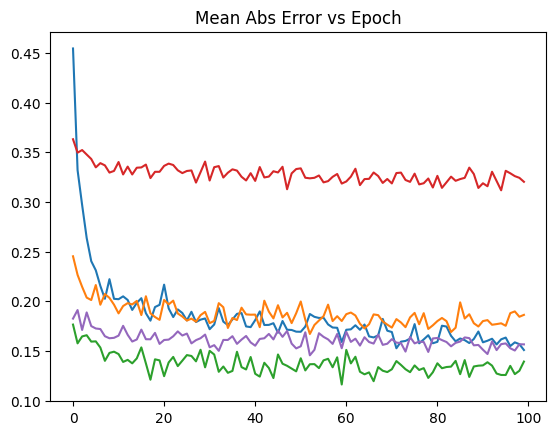

In [3]:
# Test cold fine tune eval on a user
import pandas as pd
model = NCFModel()
model.load('evaluation_cold_fine_tune_test_ncf', load_published_model=False)
model.new_seed(None)
model.set_data_loader(data_loader)
# user_to_fine_tune = 76561198021788348 # 5 tune 2 test
# user_to_fine_tune = 76561199061878606 # 18 tune 2 test
# user_to_fine_tune = 76561198255585338 # 41 tune 12 test
# user_to_fine_tune = 76561198817614482 # 49 tune 11 test
# user_to_fine_tune = 76561198202035709 # 259 tune 69 test
for user_to_fine_tune in [76561198021788348, 76561199061878606, 76561198255585338, 76561198817614482, 76561198202035709]:
    fake_interactions = pd.DataFrame(columns=model.data_loader.users_games_df.columns).astype(model.data_loader.users_games_df.dtypes)
    users_games_df = model.data_loader.users_games_df_grouped_by_user.get_group(user_to_fine_tune)
    all_users_games_df_without_test = users_games_df[users_games_df['data_split'] != 'test']
    new_users_games_df = users_games_df[users_games_df['data_split'] == 'tune']
    model._fine_tune(user_to_fine_tune, new_users_games_df, fake_interactions, all_users_games_df_without_test, fake_interactions, debug=False)
    print('Fine Tuned User Output')
    display(get_game_name_and_scores(data_loader, model.score_and_predict_n_games_for_user(user_to_fine_tune)[:10]))
    display(get_game_name_and_scores(data_loader, model.score_and_predict_n_games_for_user(user_to_fine_tune)[-10:]))

In [2]:
# data_loader = DataLoader(cache_local_dataset=True, users_games_edge_scoring_function = playtime_forever_users_games_edge_scoring_function, users_games_edge_score_normalizers = [GaussianNormalizer(1.0, 1.0)], interactions_score_normalizers = [GaussianNormalizer(0.0, 1.0)], user_game_edge_embeddings = ['playtime_forever'], game_embeddings=['name'])
data_loader = DataLoader(cache_local_dataset=True, users_games_edge_scoring_function = playtime_forever_users_games_edge_scoring_function, user_game_edge_embeddings = ['playtime_forever'], users_games_edge_score_normalizers = [GaussianNormalizer(1.0, 1.0)], interactions_score_normalizers = [GaussianNormalizer(0.0, 1.0)], game_embeddings=['numReviews', 'avgReviewScore', 'price', 'numFollowers', 'name'])
data_loader.load_random_edge_train_test_split(train_percentage=0.9, test_percentage=0.1, seed=0)
data_loader.save_data_loader_parameters('test_ncf_data_loader', overwrite=True)

In [5]:
# base collaborative filter test
save_file_name = 'test_cf_model'
cf_model = NCFModel(num_epochs = 50, embedding_size = 48, batch_percent = 0.1, learning_rate = 1e-2, weight_decay=1e-6, mlp_hidden_layer_sizes = [], seed=0, model_type='cf', fine_tune_num_epochs=1, fine_tune_learning_rate=1e-1, fine_tune_weight_decay=1e-5, save_file_name=save_file_name, nn_save_name='best')
cf_model.set_data_loader(data_loader)
cf_model.train(debug=True)
cf_model.save(save_file_name, overwrite=True)
print(cf_model.get_score_between_user_and_game(76561198835352289, 967050))
print(cf_model.get_score_between_user_and_game(76561198835352289, 578080))
print(cf_model.get_scores_between_users_and_games([76561198835352289, 76561198835352289], [967050, 578080]))
display(get_game_name_and_scores(data_loader, cf_model.score_and_predict_n_games_for_user(76561198835352289)[:10]))
display(get_game_name_and_scores(data_loader, cf_model.score_and_predict_n_games_for_user(76561198835352289)[-10:]))

Known Game Embeddings:  ['avg_review_score', 'num_reviews', 'price', 'num_followers']
Total Learnable Parameters: 5760552


Training:   0%|          | 0/50 [00:00<?, ?it/s]

torch.Size([2176443, 1]) torch.Size([2176443, 1])


Training:   0%|          | 0/50 [00:11<?, ?it/s]


KeyboardInterrupt: Interrupted by user

In [ ]:
# generalized collaborative filter test
save_file_name = 'test_gcf_model'
gcf_model = NCFModel(num_epochs = 0, embedding_size = 48, batch_percent = 0.1, learning_rate = 1e-2, weight_decay=1e-6, mlp_hidden_layer_sizes = [], seed=0, model_type='gcf', fine_tune_num_epochs=1, fine_tune_learning_rate=1e-1, fine_tune_weight_decay=1e-5, save_file_name=save_file_name, nn_save_name='best')
gcf_model.set_data_loader(data_loader)
gcf_model.train(debug=True)
gcf_model.save(save_file_name, overwrite=True)
print(gcf_model.get_score_between_user_and_game(76561198835352289, 967050))
print(gcf_model.get_score_between_user_and_game(76561198835352289, 578080))
print(gcf_model.get_scores_between_users_and_games([76561198835352289, 76561198835352289], [967050, 578080]))
display(get_game_name_and_scores(data_loader, gcf_model.score_and_predict_n_games_for_user(76561198835352289)[:10]))
display(get_game_name_and_scores(data_loader, gcf_model.score_and_predict_n_games_for_user(76561198835352289)[-10:]))

In [ ]:
# mlp test
save_file_name = 'test_mlp_model'
mlp_model = NCFModel(num_epochs = 0, embedding_size = 50, batch_percent = 0.1, learning_rate = 1e-2, weight_decay=1e-6, mlp_hidden_layer_sizes = [256, 256, 256], seed=0, model_type='mlp', fine_tune_num_epochs=1, fine_tune_learning_rate=1e-1, fine_tune_weight_decay=1e-5, save_file_name=save_file_name, nn_save_name='best')
mlp_model.set_data_loader(data_loader)
mlp_model.train(debug=True)
mlp_model.save(save_file_name, overwrite=True)
print(mlp_model.get_score_between_user_and_game(76561198835352289, 967050))
print(mlp_model.get_score_between_user_and_game(76561198835352289, 578080))
print(mlp_model.get_scores_between_users_and_games([76561198835352289, 76561198835352289], [967050, 578080]))
display(get_game_name_and_scores(data_loader, mlp_model.score_and_predict_n_games_for_user(76561198835352289)[:10]))
display(get_game_name_and_scores(data_loader, mlp_model.score_and_predict_n_games_for_user(76561198835352289)[-10:]))

In [ ]:
# ncf test
save_file_name = 'test_ncf_model'
ncf_model = NCFModel(num_epochs = 0, embedding_size = 24, batch_percent = 0.1, learning_rate = 1e-2, weight_decay=1e-6, mlp_hidden_layer_sizes = [256, 256, 256], seed=0, model_type='ncf', fine_tune_num_epochs=1, fine_tune_learning_rate=1e-1, fine_tune_weight_decay=1e-5, save_file_name=save_file_name, nn_save_name='best')
ncf_model.set_data_loader(data_loader)
ncf_model.train(debug=True)
ncf_model.save(save_file_name, overwrite=True)
print(ncf_model.get_score_between_user_and_game(76561198835352289, 967050))
print(ncf_model.get_score_between_user_and_game(76561198835352289, 578080))
print(ncf_model.get_scores_between_users_and_games([76561198835352289, 76561198835352289], [967050, 578080]))
display(get_game_name_and_scores(data_loader, ncf_model.score_and_predict_n_games_for_user(76561198835352289)[:10]))
display(get_game_name_and_scores(data_loader, ncf_model.score_and_predict_n_games_for_user(76561198835352289)[-10:]))

In [14]:
data_loader = DataLoader.load_from_file('test_evaluation_data_loader_embed_all_except_tags_genres', use_published_models_path=True, load_live_data_loader=True)
model = NCFModel()
model.load('evaluation_test_cf_embed_all_except_tags_genres_best_model_bugfix_clip_embeddings', load_published_model=True)
model.set_data_loader(data_loader)

In [15]:
# test_user = 76561199048589805 # Only 1 game
test_user = 76561198835352289 # Only 4 games
# test_user = 76561198880605436 # ~20 games
# test_user = 76561199040442492 # ~400 games
display(get_game_name_and_scores(data_loader, model.score_and_predict_n_games_for_user(test_user)[:10]))
display(get_game_name_and_scores(data_loader, model.score_and_predict_n_games_for_user(test_user)[-10:]))

,id,name,score
0,294100,RimWorld,0.589256
1,779340,Total War: THREE KINGDOMS,0.541197
2,1716740,Starfield,0.518708
3,1063730,New World,0.500298
4,1144200,Ready or Not,0.497339
5,1551360,Forza Horizon 5,0.492448
6,552990,World of Warships,0.486344
7,460930,Tom Clancy's Ghost Recon® Wildlands,0.471119
8,552520,Far Cry® 5,0.467661
9,582160,Assassin's Creed® Origins,0.462494


,id,name,score
0,502150,Interstellar Logistics Inc,-0.160361
1,409870,Phantom Brave PC,-0.168625
2,2800,X2: The Threat,-0.179539
3,553820,DeathMetal,-0.179784
4,522730,God Of Arrows VR,-0.186215
5,307210,Will Fight for Food: Super Actual Sellout: Gam...,-0.193545
6,485980,Syrian Warfare,-0.197546
7,337410,Karos,-0.200550
8,463150,BARRIER X,-0.233835
9,450850,Cube Land Arena,-0.269478
